
# step 1_1: reading data

In [1]:
import pandas as pd

In [2]:
input_data=pd.read_csv('bikeshare.csv')
input_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# step 1_2:Cleaning data

In [3]:
df = input_data.drop(['dteday'], axis=1)
# input_data.shape

In [4]:
# input_data.info()
# input_data.head()
df.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
X = df.drop('cnt',axis = 1)
X.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


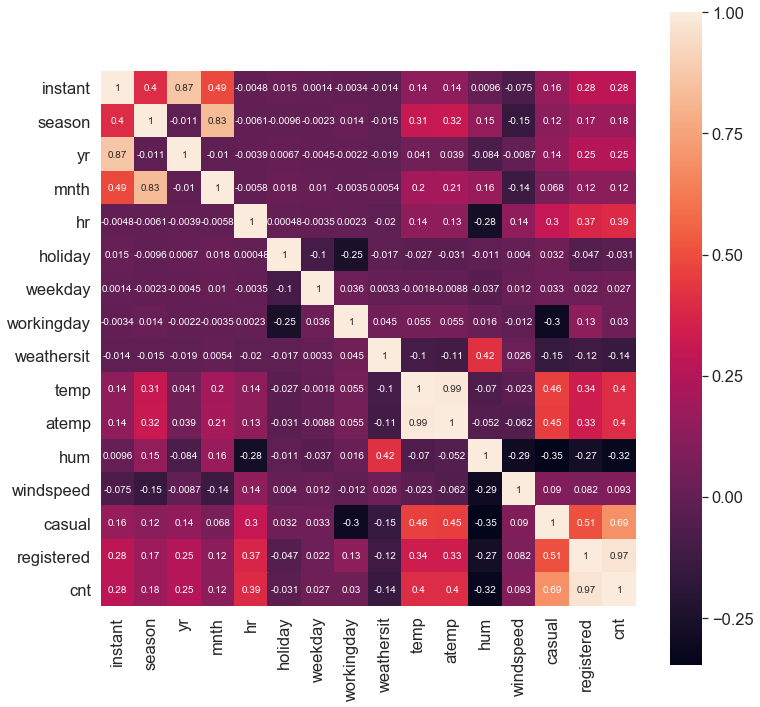

In [14]:
#Look at the correlation heatmap to determine feature selection:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.subplots(figsize = (12,12)) # (figsize = (18,18) size of the matrix
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': (10)})
#size correlaton eg1,-0.99
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
# new_model = LabelEncoder() # LabelEncoder in build classifications. 
y = LabelEncoder().fit_transform(input_data['cnt'])
# y.iloc[0:3,:]
# print(y.iloc[0:3,:])
y

array([15, 39, 31, ..., 89, 60, 48])

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2) #,random_state=42
model = LogisticRegression()
model.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: '2011-03-10'

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)